# **Automated Machine Learning**

Syamsul Rizal 1301184064

Chamadani Faisal Amri 1301184075


# Formulasi Masalah

memakai TPOT sebagai tools

In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.9 MB/s 
     |████████████████████████████████| 160 kB 41.6 MB/s 
     |████████████████████████████████| 173.5 MB 12 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=baca6a3f829cc344cdd44e8645fe38afc4939fde6c186382c1747e8591fe771a
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
import numpy as np
# Library untuk Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#Library untuk Preprocessing
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# Library untuk Pemodelan dengan TPOT
from tpot import TPOTClassifier
# Library untuk Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, classification_report

# Eksplorasi dan Persiapan Data

In [ ]:
# Memanggil dataset dan ditampilkan
df = pd.read_csv('https://raw.githubusercontent.com/rizalsyamsul/Malin/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Cleaning

### Duplicate

In [ ]:
#mengecek nilai duplikat
df.duplicated().sum()

0

### Missing Values/Null

In [ ]:
#mengecek nilai null
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
#mendrop nilai null
df= df.dropna()
df.reset_index(drop=True, inplace=True) #reset index
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Drop Column

In [ ]:
#mendrop kolom yang tidak penting
col = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df.drop(col, inplace=True, axis=1)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


## Label Encoding

In [ ]:
#mengecek info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  object 
 17  RainTomorrow   56420 non-null  object 
dtypes: flo

In [ ]:
#fungsi untuk merubah object menjadi int dengan library LabelEncoding
stop = df.columns
for col in stop:
    if df[col].dtypes == 'object':
        endc = LabelEncoder()
        df[col] = endc.fit_transform(df[col])

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

## Outliers

In [ ]:
#memisahkan label 
X = df.copy().drop(['RainTomorrow'], axis=1)
Y = df.copy()['RainTomorrow']

In [ ]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


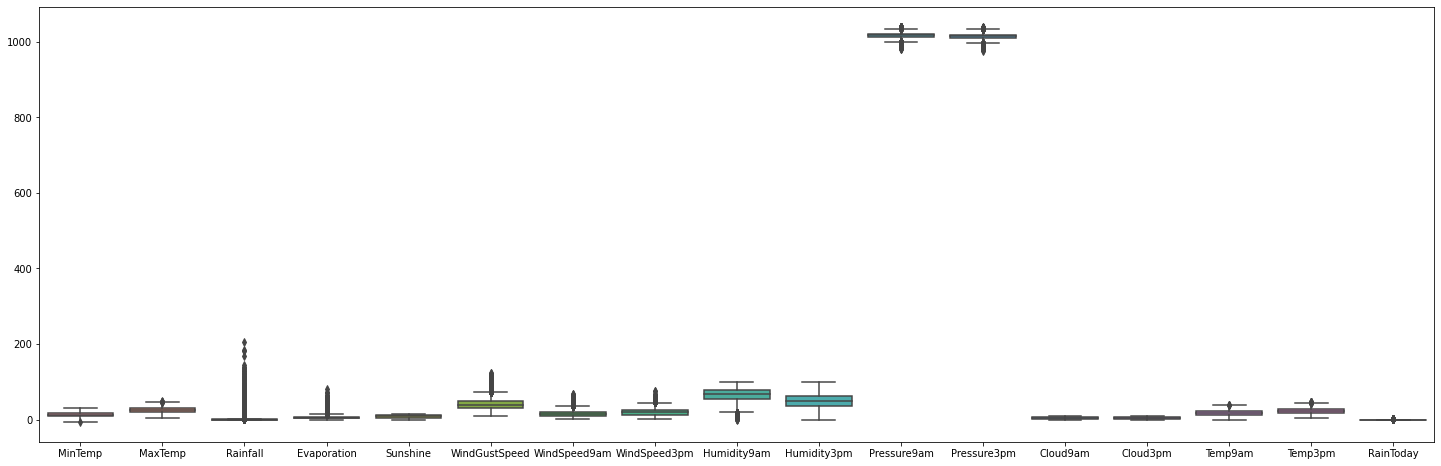

In [ ]:
#mengecek outlier pada data
plt.figure(figsize=(25,8))
sns.boxplot(data=X)

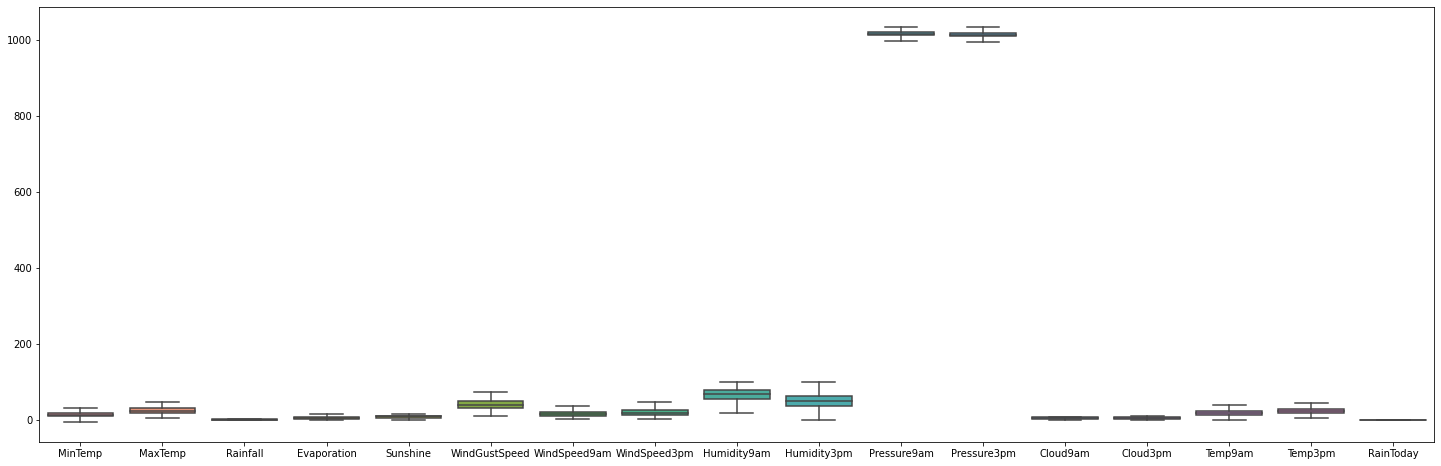

In [ ]:
#menghilangkan outlier pada data
for i in range(len(X.columns)):
  q1 = X.iloc[:, i].quantile(0.25)
  q3 = X.iloc[:, i].quantile(0.75)
  iqr = q3 - q1

  lb = q1 - (iqr * 1.5)
  ub = q3 + (iqr * 1.5)
  def apply(x):
    if x > ub:
      return ub
    elif x < lb:
      return lb
    else:
      return x

  X.iloc[:, i] = X.iloc[:, i].apply(apply)

plt.figure(figsize=(25,8))
sns.boxplot(data=X)

## Scalling

In [ ]:
#scaling data dengan menggunakan StandardScaler agar sebaran data tidak terlalu jauh
std = StandardScaler()
data = std.fit_transform(X)
data

array([[ 0.69121037,  1.57538608, -0.63056393, ...,  1.27821296,
         1.56396471,  0.        ],
       [ 0.76913327,  0.67154971, -0.63056393, ...,  0.31899078,
         0.62763923,  0.        ],
       [ 0.92497907,  1.9197047 , -0.63056393, ...,  1.59795369,
         1.783416  ,  0.        ],
       ...,
       [ 1.12757861,  1.23106747, -0.63056393, ...,  1.00414948,
         1.3737736 ,  0.        ],
       [ 0.94056365,  1.08760138, -0.63056393, ...,  1.00414948,
         0.94950112,  0.        ],
       [ 1.04965571,  1.07325477, -0.63056393, ...,  1.09550397,
         1.21284266,  0.        ]])

##Export Data

In [ ]:
kolom = X.columns
df_prepro = pd.DataFrame(data= data, columns= kolom)
df_prepro['RainTomorrow'] = Y
df_prepro

In [ ]:
df_prepro.to_csv("data_preprocess.csv")

## Split data

In [ ]:
# Split data train & test
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.25, random_state=20)

# Pemodelan

In [ ]:
#modeling dengan TPOT dengan ketentuan generasi=5 dan populasi=20
model = TPOTClassifier(generations=5, population_size=20, random_state=20, verbosity=2)
model.fit(X_train, Y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8578045610303675

Generation 2 - Current best internal CV score: 0.8590334396786009

Generation 3 - Current best internal CV score: 0.8590334396786009

Generation 4 - Current best internal CV score: 0.8590334396786009

Generation 5 - Current best internal CV score: 0.8590334396786009

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=16, n_estimators=100, n_jobs=1, subsample=0.55, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=20, verbosity=2)

In [ ]:
#memprediksi nilai Y
Y_pred = model.predict(X_test)

In [ ]:
#perbandingan antara nilai Y actual dan juga prediksi
Y_Predict = Y_pred.tolist()
Y_Actual = Y_test.tolist()
data = {'Actual' : Y_Actual,'predict' : Y_Predict}
df_compare = pd.DataFrame(data)
df_compare

,Actual,predict
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
14100,1,0
14101,1,1
14102,0,0
14103,0,0


# Evaluasi

In [ ]:
#menghitung akurasi dan f1 score
arr_evl = []
acc1 = accuracy_score(Y_test,Y_pred)*100
f1 = f1_score(Y_test,Y_pred)*100
arr_evl.append([acc1,f1])

In [ ]:
#melihat classification report yang ada
print("Accuracy : ",acc1)  
print("Confusion Matrix: \n",confusion_matrix(Y_test, Y_pred))      
print("Report : ", classification_report(Y_test, Y_pred))

Accuracy :  85.63629918468628
Confusion Matrix: 
 [[10380   664]
 [ 1362  1699]]
Report :                precision    recall  f1-score   support

           0       0.88      0.94      0.91     11044
           1       0.72      0.56      0.63      3061

    accuracy                           0.86     14105
   macro avg       0.80      0.75      0.77     14105
weighted avg       0.85      0.86      0.85     14105



# Eksperimen


melakukan eksperimen dengan merubah nilai generasi dan populasi dalam parameter TPOT

In [ ]:
#modeling dengan TPOT dengan ketentuan generasi=10 dan populasi=5
model2 = TPOTClassifier(generations=10, population_size=5, verbosity=2)
model2.fit(X_train, Y_train)

Optimization Progress:   0%|          | 0/55 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8535034857615502

Generation 2 - Current best internal CV score: 0.8535034857615502

Generation 3 - Current best internal CV score: 0.8573082831147347

Generation 4 - Current best internal CV score: 0.8579699870022452

Generation 5 - Current best internal CV score: 0.8579699870022452

Generation 6 - Current best internal CV score: 0.8579699870022452

Generation 7 - Current best internal CV score: 0.8579699870022452

Generation 8 - Current best internal CV score: 0.8579699870022452

Generation 9 - Current best internal CV score: 0.8579699870022452

Generation 10 - Current best internal CV score: 0.8579699870022452

Best pipeline: RandomForestClassifier(SGDClassifier(input_matrix, alpha=0.0, eta0=0.01, fit_intercept=False, l1_ratio=0.5, learning_rate=constant, loss=hinge, penalty=elasticnet, power_t=0.5), bootstrap=True, criterion=gini, max_features=0.4, min_samples_leaf=17, min_samples_split=7, n_estimators=100)


TPOTClassifier(generations=10, population_size=5, verbosity=2)

In [ ]:
#memprediksi nilai Y
Y_pred2 = model2.predict(X_test)

In [ ]:
#perbandingan antara nilai Y actual dan juga prediksi
Y_Predict = Y_pred2.tolist()
Y_Actual = Y_test.tolist()
data = {'Actual' : Y_Actual,'predict' : Y_Predict}
df_compare2 = pd.DataFrame(data)
df_compare2

,Actual,predict
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
14100,1,1
14101,1,1
14102,0,0
14103,0,0


In [ ]:
acc2 = accuracy_score(Y_test,Y_pred2)*100
f2 = f1_score(Y_test,Y_pred2)*100
arr_evl.append([acc2,f2])

In [ ]:
print("Accuracy : ",acc2) 
print("Confusion Matrix: \n",confusion_matrix(Y_test, Y_pred2))      
print("Report : ", classification_report(Y_test, Y_pred2))

Accuracy :  85.64338886919532
Confusion Matrix: 
 [[10494   550]
 [ 1475  1586]]
Report :                precision    recall  f1-score   support

           0       0.88      0.95      0.91     11044
           1       0.74      0.52      0.61      3061

    accuracy                           0.86     14105
   macro avg       0.81      0.73      0.76     14105
weighted avg       0.85      0.86      0.85     14105



# Kesimpulan

Membandingkan hasil dari proses pemodelan dan eksperimen

In [ ]:
df_kes = pd.DataFrame(np.array(arr_evl))
df_kes.columns = ['Accuracy','F1-Score']
df_kes

,Accuracy,F1-Score
0,85.636299,62.647493
1,85.643389,61.035213
